In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

from sklearn.linear_model import Ridge

### LASSO L1 (Least Absolute Shrinkage and Selection Operator)

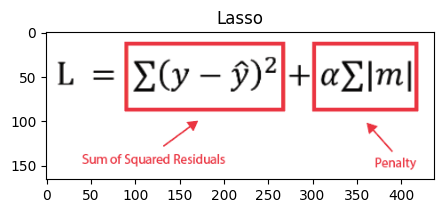

In [2]:
# Load image

plt.figure(figsize= (5,6))
mi = img.imread(r'lasso.png')
plt.title('Lasso')
plt.imshow(mi);

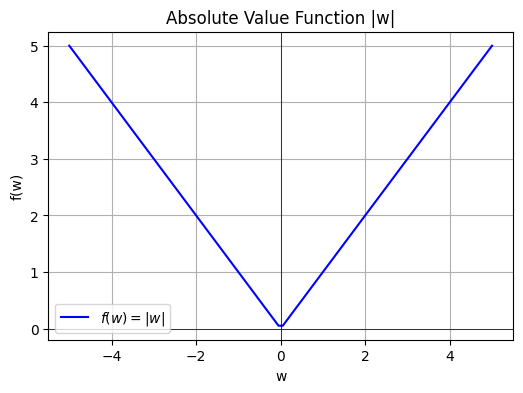

In [3]:
# Define w values
w = np.linspace(-5, 5, 100)
f_w = np.abs(w)  # Absolute function

# Plot
plt.figure(figsize=(6, 4))
plt.plot(w, f_w, label=r'$f(w) = |w|$', color='b')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel("w")
plt.ylabel("f(w)")
plt.title("Absolute Value Function |w|")
plt.legend()
plt.grid()
plt.show()

### Lasso from scratch

In [4]:
def lasso_regression_gd(X, y, alpha=0.01, lambda_=1.0, epochs=1000):
    m, n = X.shape
    theta = np.zeros((n, 1))  # Initialize weights to zeros
   
    for epoch in range(epochs):
        gradient = (-1/m) * X.T @ (y - X @ theta) + lambda_ * np.sign(theta)
        theta -= alpha * gradient
       
        if epoch % 100 == 0:
            loss = (1/(2*m)) * np.sum((y - X @ theta)**2) + lambda_ * np.sum(np.abs(theta))
            print(f"Epoch {epoch}: Loss = {loss:.4f}")
   
    return theta

# Example usage:
np.random.seed(42)
X = np.random.randn(100, 2)  # 100 samples, 2 features
y = 3 * X[:, 0:1] + 2 * X[:, 1:2] + np.random.randn(100, 1)  # Generating target with noise

# Run Lasso Regression with Gradient Descent
theta_optimal = lasso_regression_gd(X, y, alpha=0.1, lambda_=0.5, epochs=1000)
print("Optimal theta:", theta_optimal)

Epoch 0: Loss = 5.4092
Epoch 100: Loss = 2.7753
Epoch 200: Loss = 2.7753
Epoch 300: Loss = 2.7753
Epoch 400: Loss = 2.7753
Epoch 500: Loss = 2.7753
Epoch 600: Loss = 2.7753
Epoch 700: Loss = 2.7753
Epoch 800: Loss = 2.7753
Epoch 900: Loss = 2.7753
Optimal theta: [[2.51531569]
 [1.34144528]]


* `@ is np.dot` <br>
* `np.sign returns -1 if x < 0, 0 if x==0, 1 if x > 0 . nan is returned for nan inputs.` <br>
* `theta are weights` <br>

**np.sign(theta)** : <br> `We are using it to calculate subgradient. A subgradient is a generalization of gradient that allows us to compute derivatives for a functions that are not differentiable at some points.`

### Simple Linear Lasso by OLS

### Multi Linear Lasso by Gradient Descent

First 5 rows of X:
 [[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]
 [ 1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783]]
First 5 values of y:
 [ 2.37102203  3.82072514  4.17233648  1.00140576 -2.73439965]
Epoch 0: Loss = 3.6710
Epoch 100: Loss = 2.2625
Epoch 200: Loss = 2.2525
Epoch 300: Loss = 2.2430
Epoch 400: Loss = 2.2632
Epoch 500: Loss = 2.2470
Epoch 600: Loss = 2.2516
Epoch 700: Loss = 2.2584
Epoch 800: Loss = 2.2432
Epoch 900: Loss = 2.2580

Optimal theta values after Lasso regression: [2.1659971  0.0271694  1.47855826]


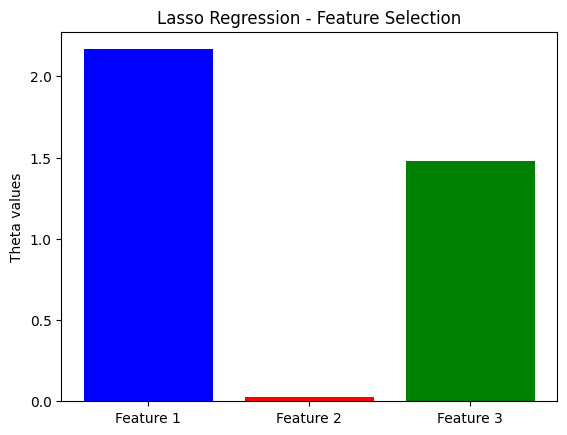

In [65]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate 100 samples with 3 features
m, n = 100, 3
X = np.random.randn(m, n)  # Random normal distribution

# True weights (Feature 2 is irrelevant)
true_theta = np.array([3, 0, 2])  

# Generate target variable y with some noise
y = X @ true_theta + np.random.randn(m) * 0.5  

# Print first few rows
print("First 5 rows of X:\n", X[:5])
print("First 5 values of y:\n", y[:5])

def lasso_regression_gd(X, y, alpha=0.1, lambda_=0.5, epochs=1000):
    m, n = X.shape
    theta = np.ones(n)  # Initialize all weights to 1

    for epoch in range(epochs):
        # Compute the gradient for MSE
        gradient = (-1/m) * X.T @ (y - X @ theta)

        # Apply Lasso shrinkage
        gradient += lambda_ * np.sign(theta)

        # Update weights
        theta -= alpha * gradient

        # Print loss every 100 epochs
        if epoch % 100 == 0:
            loss = (1/(2*m)) * np.sum((y - X @ theta)**2) + lambda_ * np.sum(np.abs(theta))
            print(f"Epoch {epoch}: Loss = {loss:.4f}")
   
    return theta


# Run Lasso Regression
theta_optimal = lasso_regression_gd(X, y, alpha=0.1, lambda_=0.5, epochs=1000)

print("\nOptimal theta values after Lasso regression:", theta_optimal)

# Plot the final weights
plt.bar(range(len(theta_optimal)), theta_optimal, color=['blue', 'red', 'green'])
plt.xticks(range(len(theta_optimal)), ['Feature 1', 'Feature 2', 'Feature 3'])
plt.ylabel("Theta values")
plt.title("Lasso Regression - Feature Selection")
plt.show()

In [68]:
def lasso_regression_gd(X, y, alpha=0.1, lambda_=0.5, epochs=10, threshold=0.1):
    m, n = X.shape
    theta = np.ones(n)  # Initialize all weights to 1
   
    for epoch in range(epochs):
        # Compute the gradient for MSE
        gradient = (-1/m) * X.T @ (y - X @ theta)

        # Apply Lasso shrinkage (L1 regularization)
        gradient += lambda_ * np.sign(theta)

        # Update weights
        theta -= alpha * gradient

        # Apply thresholding to force small weights to zero
        theta[np.abs(theta) < threshold] = 0

        # Print weights after each epoch
        print(f"Epoch {epoch + 1}: Theta = {theta}")
   
    return theta

# Example dataset with 3 features
X = np.array([[2, 0.5, 0],
              [3, 0.2, 0.1],
              [5, 0.1, -0.2]])
y = np.array([6, 9, 15])

# Run Lasso Regression
optimal_theta = lasso_regression_gd(X, y, alpha=0.1, lambda_=0.5, epochs=19)

print("\nFinal theta values after Lasso regression:", optimal_theta)

Epoch 1: Theta = [3.43666667 1.08       0.90166667]
Epoch 2: Theta = [2.77899444 0.98863333 0.86035278]
Epoch 3: Theta = [2.95980538 0.94421739 0.80376206]
Epoch 4: Theta = [2.9133778  0.88758884 0.75148458]
Epoch 5: Theta = [2.92850268 0.8347765  0.69821092]
Epoch 6: Theta = [2.92692319 0.78143355 0.64537897]
Epoch 7: Theta = [2.92984564 0.72873459 0.59259821]
Epoch 8: Theta = [2.9315237  0.67635805 0.53997361]
Epoch 9: Theta = [2.93351467 0.62438781 0.48747588]
Epoch 10: Theta = [2.93539671 0.57279791 0.43511209]
Epoch 11: Theta = [2.93728431 0.52159216 0.38287949]
Epoch 12: Theta = [2.93914659 0.47076634 0.330778  ]
Epoch 13: Theta = [2.94099209 0.42031841 0.27880679]
Epoch 14: Theta = [2.94281865 0.37024578 0.22696526]
Epoch 15: Theta = [2.94462701 0.32054602 0.17525275]
Epoch 16: Theta = [2.94641714 0.27121667 0.12366863]
Epoch 17: Theta = [2.9481892 0.2222553 0.       ]
Epoch 18: Theta = [2.94825834 0.1736595  0.        ]
Epoch 19: Theta = [2.95164161 0.12554483 0.        ]

Fina